In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Pre-processing

In [ ]:
#loading the dataset and printing the first few datapoints
dataset= pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#shape of dataset
dataset.shape

(7043, 21)

In [ ]:
dataset.info()#gives an idea abt data types in the data set also null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.shape

(7043, 21)

In [ ]:
#removing unique col
dataset.drop('customerID', axis=1, inplace=True)

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Here most of the columns are of object type so converting them to numeric.
Using Label Encoder to encode all object type data.

In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [ ]:

label_encoder = LabelEncoder()
for col in dataset.columns:
    if dataset[col].dtype == 'object':
            dataset[col] = label_encoder.fit_transform(dataset[col])




ploting Histograms to understand how data in each row ranges, also here we can understand data it  the spread and skewness of the data

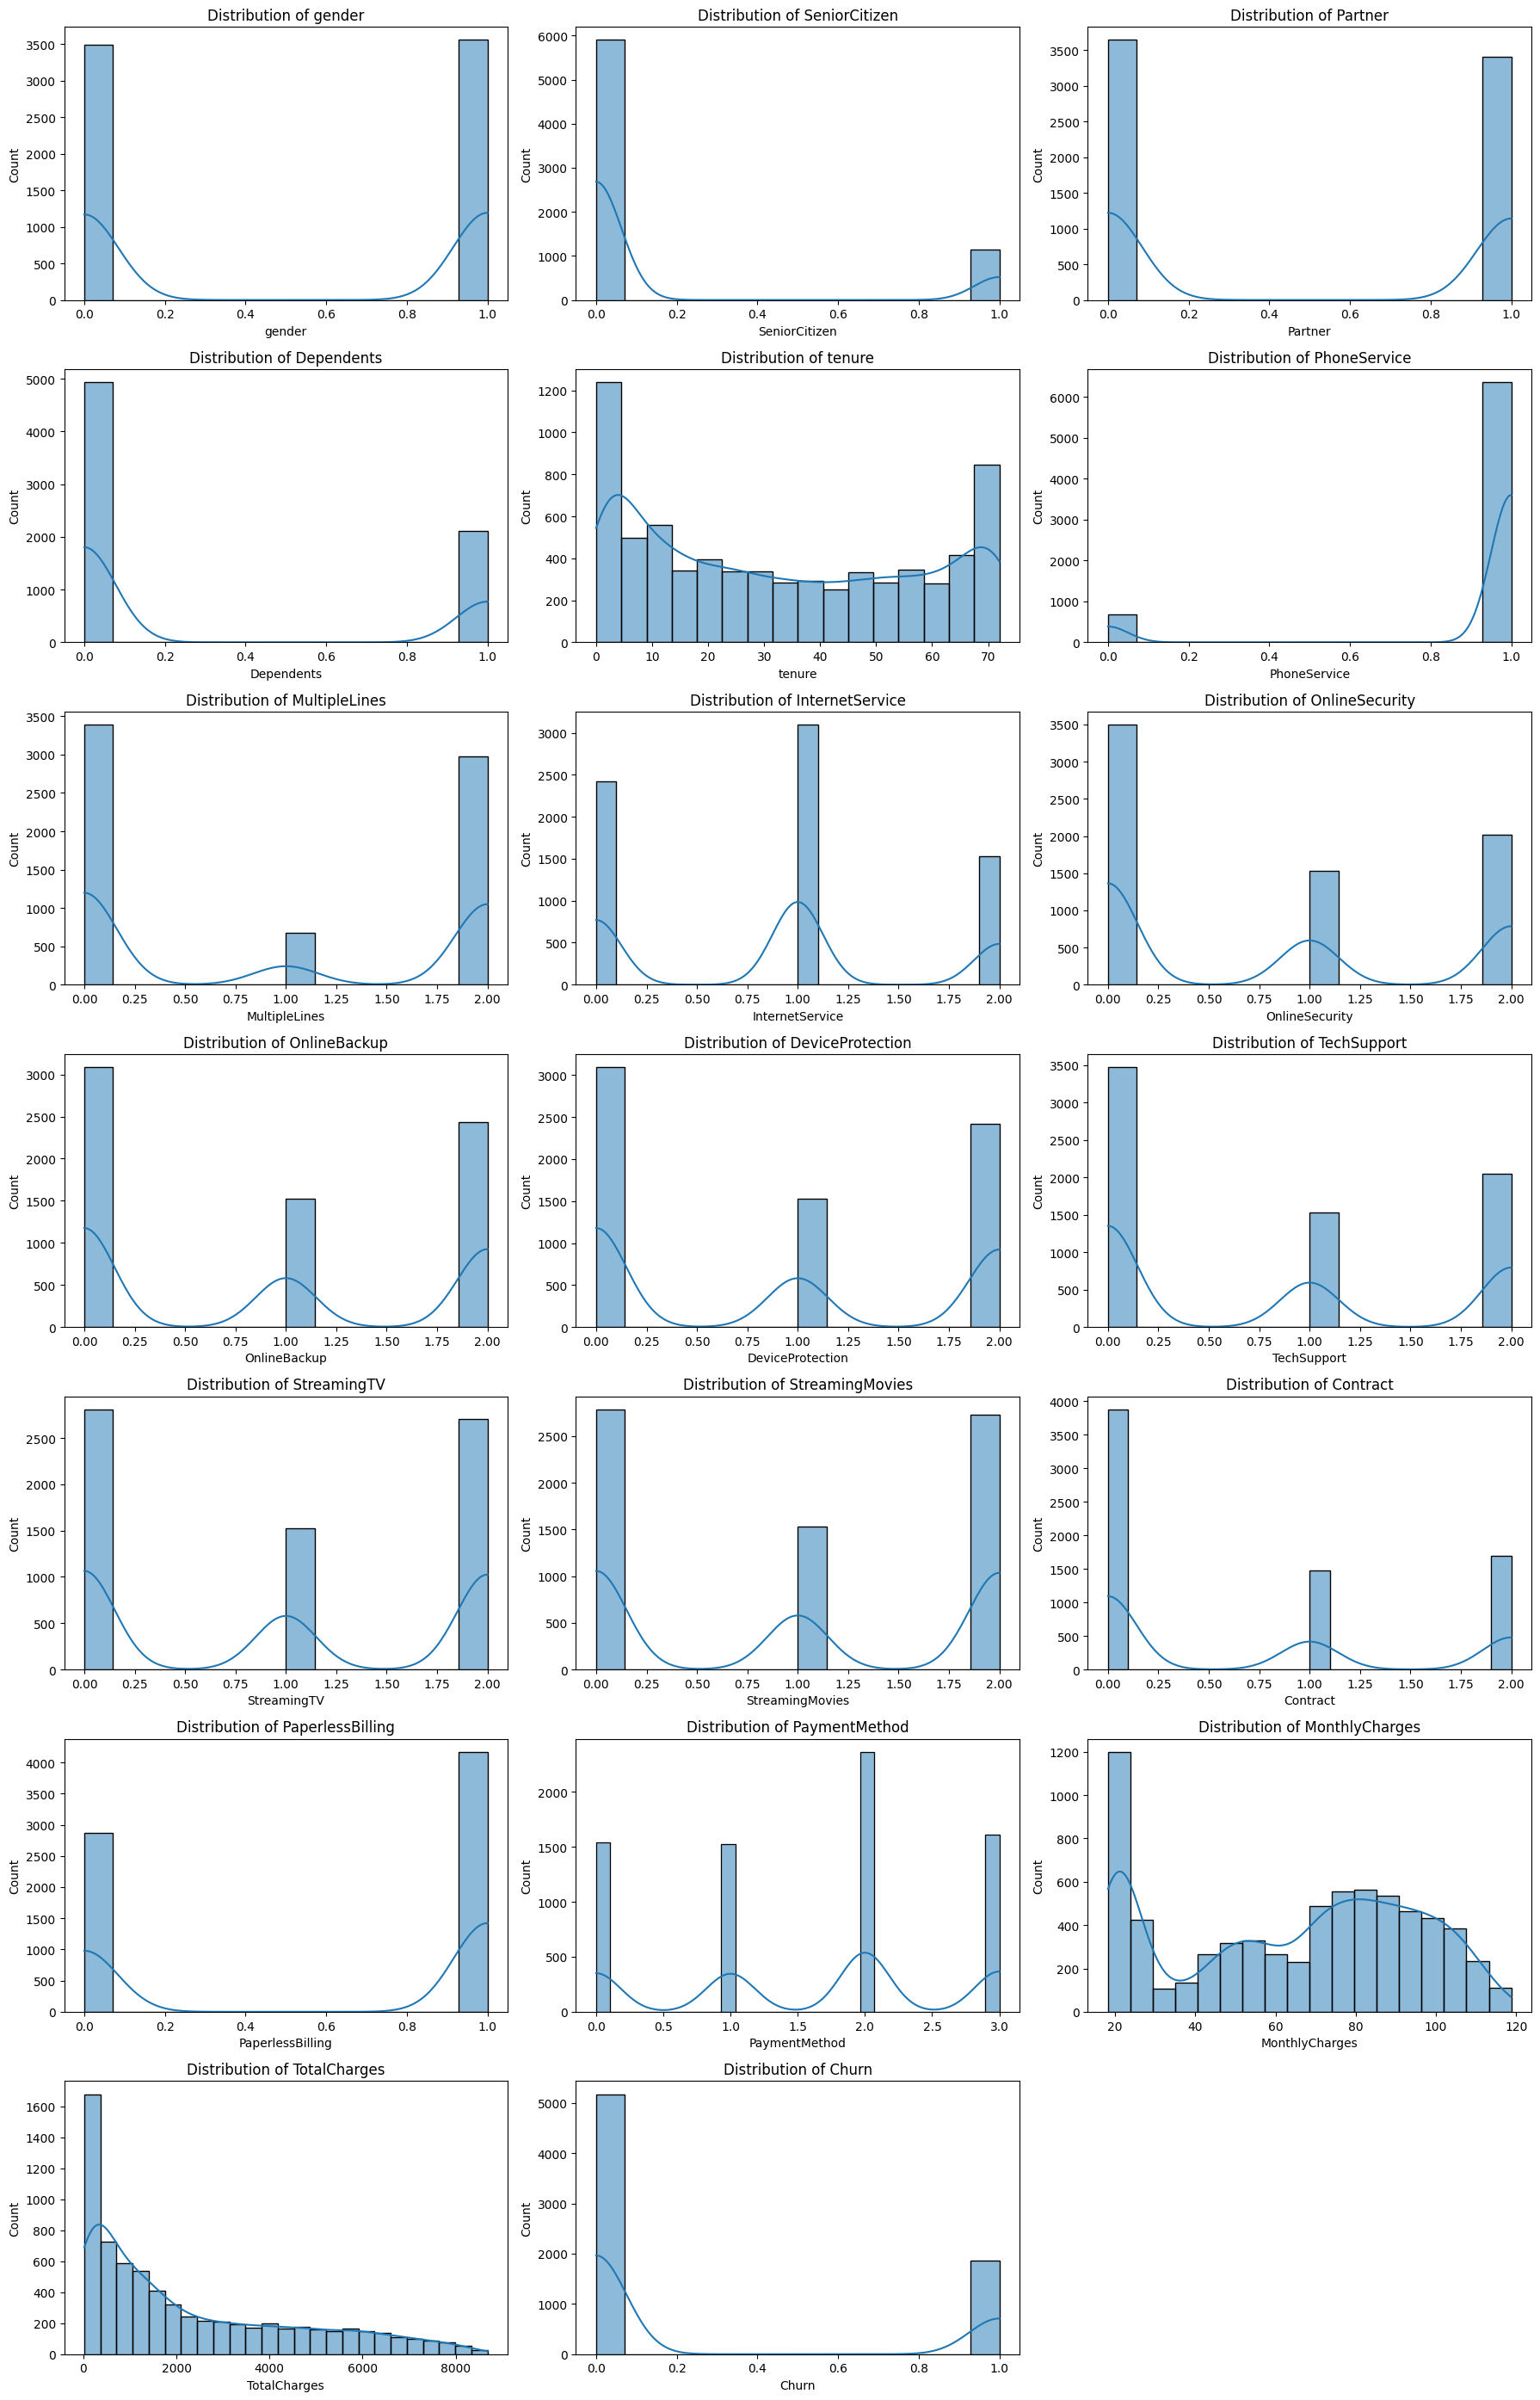

In [ ]:
columns = dataset.columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Correlation Heatmap is added to visualizes relationships between variables

Original features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Reduced features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


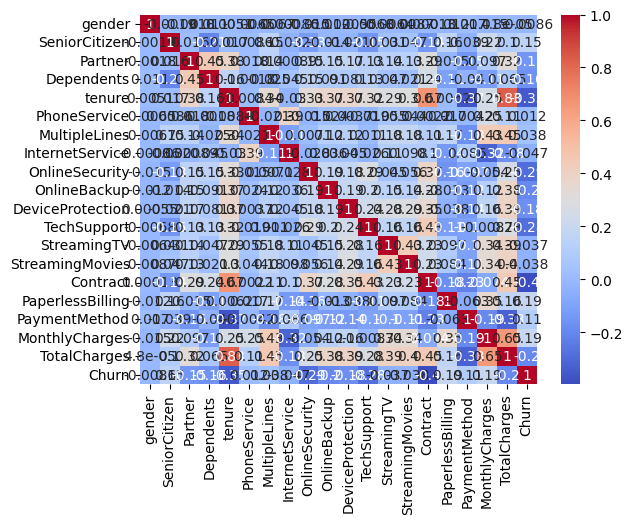

In [ ]:

# Calculate correlation matrix
corr_matrix = dataset.corr()
# Display correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()
# Get the correlation of features with the target
correlation_with_target = corr_matrix['Churn'].drop('Churn')
# Set a threshold for dropping features
threshold = 0.1
# Drop features with correlation less than the threshold
features_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
dataset = dataset.drop(columns=features_to_drop)

print(f"Original features: {dataset.columns.tolist()}")
print(f"Reduced features: {dataset.columns.tolist()}")


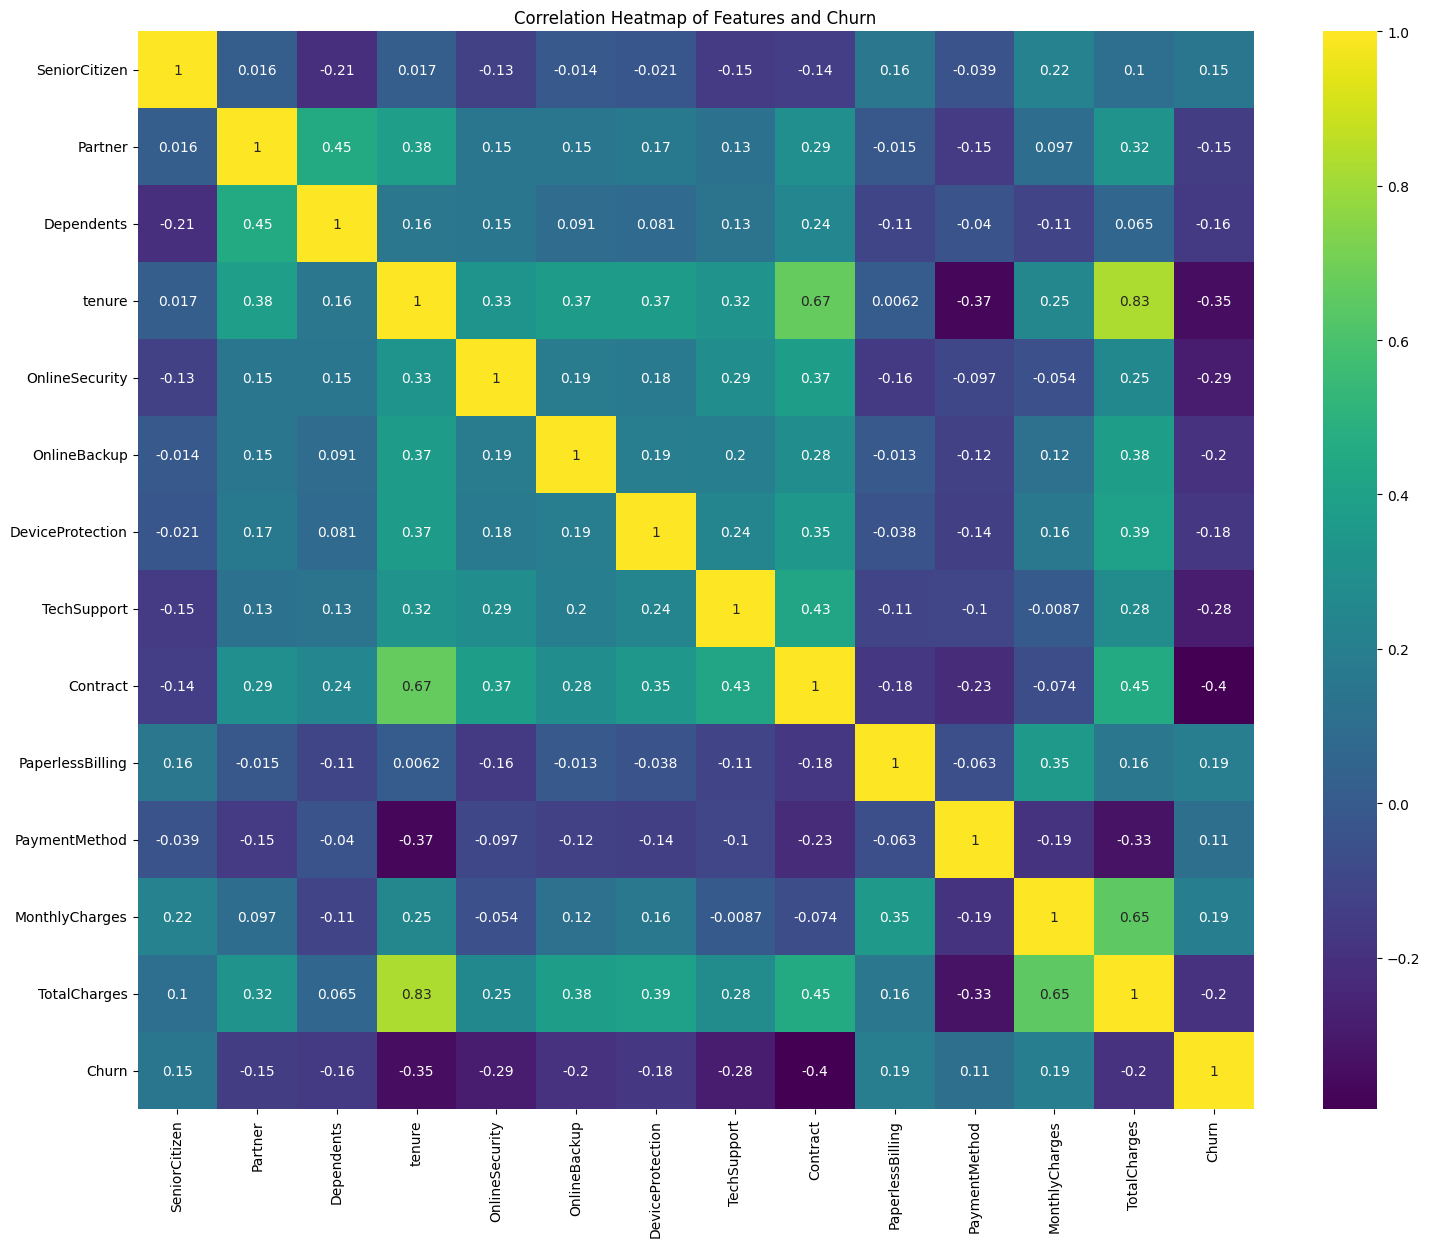

In [ ]:

corr_matrix = dataset.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Features and Churn')
plt.show()

##Preprocessing

Checking for missing value and if found need to be handled

In [ ]:
#checking for missing value
dataset.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
dataset['TotalCharges']=dataset['TotalCharges'].replace(0,np.NaN)
mean=int(dataset['TotalCharges'].mean(skipna=True))
dataset['TotalCharges']=dataset['TotalCharges'].replace(np.NaN,mean)

Looking for outliers usig IQR and using box plos understand the ranges (lb,ub)

SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


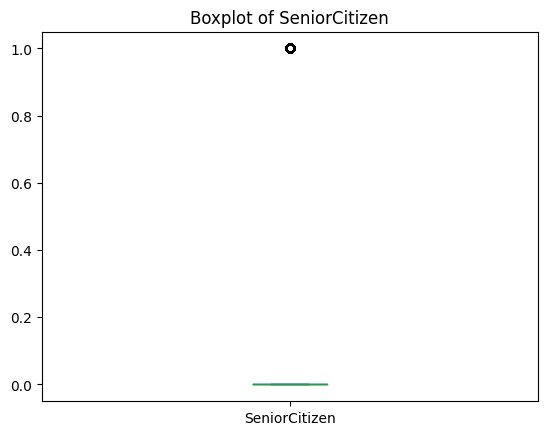

In [ ]:
#Checking for outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((dataset < (Q1 - threshold * IQR)) | (dataset > (Q3 + threshold * IQR)))
print(outliers.sum())


for col in dataset.columns:
    if outliers[col].any():
        plt.figure()
        dataset[col].plot(kind='box')
        plt.title(f'Boxplot of {col}')
        plt.show()

Analysing lower bound ,upper bound and threshold, in order to manage them better

In [ ]:
def identify_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers_lower = df[column][df[column] < lower_bound]
    outliers_upper = df[column][df[column] > upper_bound]

    return {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_below_lower_bound": outliers_lower.tolist(),
        "outliers_above_upper_bound": outliers_upper.tolist()
    }


results = identify_outliers(dataset, 'SeniorCitizen')
print("Lower bound for outliers:", results["lower_bound"])
print("Upper bound for outliers:", results["upper_bound"])
print("Outliers in column '' below lower bound:", results["outliers_below_lower_bound"])
print("Outliers in column '' above upper bound:", results["outliers_above_upper_bound"])
print()
# results = identify_outliers(dataset, 'PhoneService')
# print("Lower bound for outliers:", results["lower_bound"])
# print("Upper bound for outliers:", results["upper_bound"])
# print("Outliers in column '' below lower bound:", results["outliers_below_lower_bound"])
# print("Outliers in column '' above upper bound:", results["outliers_above_upper_bound"])



Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
Outliers in column '' below lower bound: []
Outliers in column '' above upper bound: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# for col in dataset.columns:
#     if outliers[col].any():  # Check if there are any outliers in the column
#         col_mean = dataset[col].mean()
#         dataset[col] = np.where(outliers[col], col_mean, dataset[col])
#         plt.figure()
#         dataset[col].plot(kind='box')
#         plt.title(f'Boxplot of {col} after outlier treatment')
#         plt.show()



In [ ]:
# using median imputation for dealing outliners
# def median_imputation(df, column):
#     sns.boxplot(df[column])
#     plt.title(f"Box Plot before median imputation for {column}")
#     plt.show()
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     lower_tail = q1 - 1.5 * iqr
#     upper_tail = q3 + 1.5 * iqr
#     med = np.median(df[column])

#     df[column] = df[column].apply(lambda x: med if x < lower_tail or x > upper_tail else x)

#     sns.boxplot(df[column])
#     plt.title(f"Box Plot after median imputation for {column}")
#     plt.show()

#     return df
# dataset = median_imputation(dataset, 'SeniorCitizen')
# dataset = median_imputation(dataset, 'PhoneService')



Understanding: The data points identified as outliers are not simple outliers; they are considered outliers due to  imbalance in their respective columns.
Imbalanced columns will be addressed later

In [ ]:
# Splitting dataset into independent variables and target variable
X =dataset.iloc[:,:-1]
y =dataset.iloc[:,-1]
print(X.head())
print(y.head())

   SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0       1               0             2   
1              0        0           0      34               2             0   
2              0        0           0       2               2             2   
3              0        0           0      45               2             0   
4              0        0           0       2               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  
0           29.8

In [ ]:
print(X.shape)
print(y.shape)

(7043, 13)
(7043,)


##Splitting the DataSet

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)


##Resembling

Why here?


Resampling should be applied after train-test split to ensure unbiased evaluation of model performance and to simulate real-world scenarios where models are applied on new, unseen data ie,the resampling techniques should mimic this by applying them only on the training data, allowing the test set to remain as a true representation of unseen data.

representing the current distribution of data

In [ ]:
# print( y_train.value_counts())
# print( y_train.value_counts(normalize=True) * 100)
# print(X_train['SeniorCitizen'].value_counts())
# print(X_train['SeniorCitizen'].value_counts(normalize=True) * 100)
# print(X_train['PhoneService'].value_counts())
# print(X_train['PhoneService'].value_counts(normalize=True) * 100)

Performing resampling

In [ ]:
X_train.shape

(5634, 13)

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the logistic regression model



In [ ]:
X_train.shape

(8276, 13)

Model

In [ ]:

def evaluate_model(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics
    metrics = precision_recall_fscore_support(y_true, y_pred, average='binary')
    precision, recall, fscore, _ = metrics

    # Plot confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print metrics
    print("\nMetrics:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", fscore)

    # Identify TP, FP, TN, FN
    tn, fp, fn, tp = cm.ravel()
    print("\nConfusion Matrix Details:")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")


Accuracy: 0.7615330021291696

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409


Confusion Matrix:
[[782 254]
 [ 82 291]]


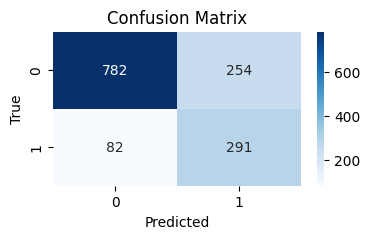


Metrics:
Precision: 0.5339449541284403
Recall: 0.7801608579088471
F1-score: 0.6339869281045751

Confusion Matrix Details:
True Negatives (TN): 782
False Positives (FP): 254
False Negatives (FN): 82
True Positives (TP): 291


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred)

Accuracy: 0.7792760823278921

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1036
           1       0.58      0.63      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409


Confusion Matrix:
[[864 172]
 [139 234]]


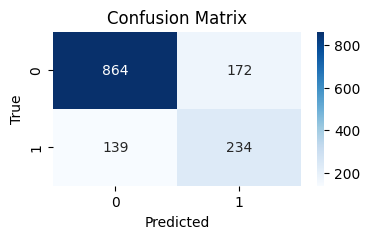


Metrics:
Precision: 0.5763546798029556
Recall: 0.6273458445040214
F1-score: 0.6007702182284981

Confusion Matrix Details:
True Negatives (TN): 864
False Positives (FP): 172
False Negatives (FN): 139
True Positives (TP): 234


In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred)

Accuracy: 0.7785663591199432
Confusion Matrix:
 [[881 155]
 [157 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409



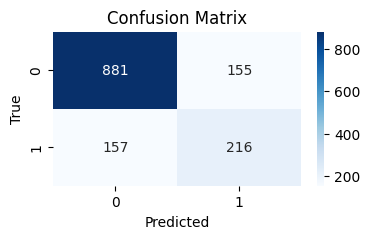


Metrics:
Precision: 0.5822102425876011
Recall: 0.579088471849866
F1-score: 0.5806451612903226

Confusion Matrix Details:
True Negatives (TN): 881
False Positives (FP): 155
False Negatives (FN): 157
True Positives (TP): 216


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
evaluate_model(y_test, y_pred)

Accuracy: 0.765791341376863

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1036
           1       0.55      0.67      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409


Confusion Matrix:
[[830 206]
 [124 249]]


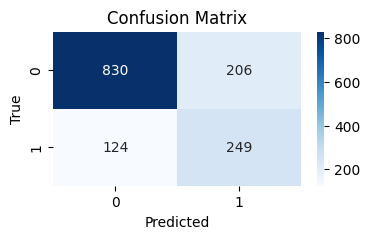


Metrics:
Precision: 0.5472527472527473
Recall: 0.6675603217158177
F1-score: 0.601449275362319

Confusion Matrix Details:
True Negatives (TN): 830
False Positives (FP): 206
False Negatives (FN): 124
True Positives (TP): 249


In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred)

evaluation

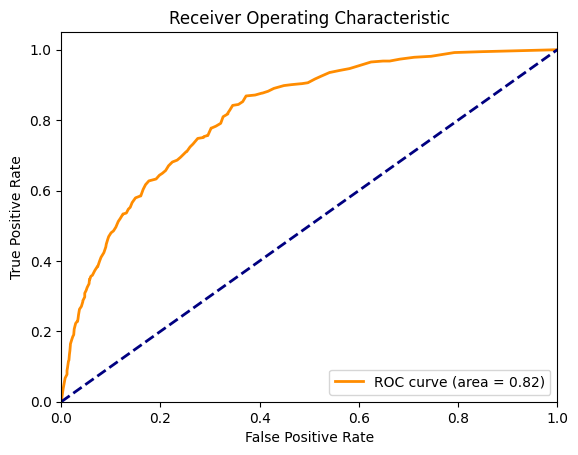

In [ ]:

# Predict probabilities for the test set
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

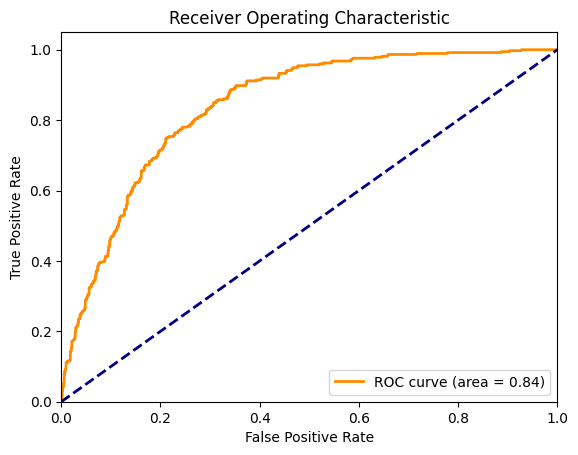

In [ ]:
# Predict probabilities for the test set
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

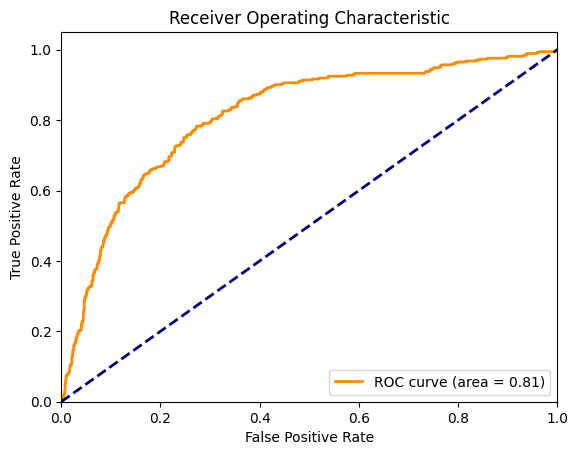

In [ ]:
# Predict probabilities for the test set
y_prob = svm.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

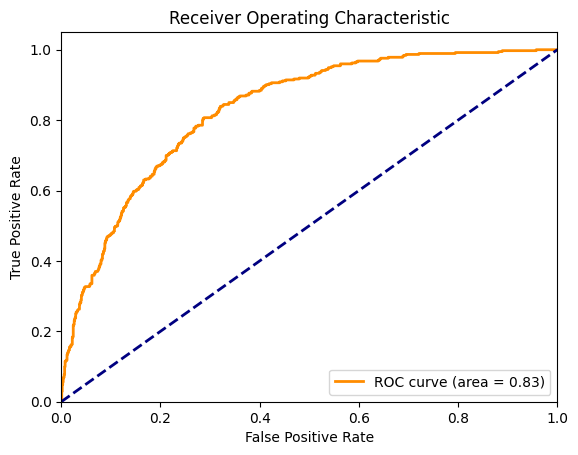

In [ ]:
# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:

# # Calculate correlation matrix
# corr_matrix = dataset.corr()
# # Display correlation matrix
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()
# # Get the correlation of features with the target
# correlation_with_target = corr_matrix['Churn'].drop('Churn')
# # Set a threshold for dropping features
# threshold = 0.1
# # Drop features with correlation less than the threshold
# features_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
# dataset = dataset.drop(columns=features_to_drop)

# print(f"Original features: {dataset.columns.tolist()}")
# print(f"Reduced features: {dataset.columns.tolist()}")
